CRIME PREDICTION AND ANALYSIS KERNEL 2


## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('data.csv')


In [3]:
data=pd.read_csv('data.csv')


In [4]:
dataset.head()


,timestamp,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28-02-2018 21:00,1,0,0,0,0,0,22.737260,75.875987
1,28-02-2018 21:15,1,0,0,0,0,0,22.720992,75.876083
2,28-02-2018 10:15,0,0,1,0,0,0,22.736676,75.883168
3,28-02-2018 10:15,0,0,1,0,0,0,22.746527,75.887139
4,28-02-2018 10:30,0,0,1,0,0,0,22.769531,75.888772


In [5]:
for col in data:
    print (type(data[col][1]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format = '%d/%m/%Y %H:%M:%S')


In [8]:
data['timestamp']

0      2018-02-28 21:00:00
1      2018-02-28 21:15:00
2      2018-02-28 10:15:00
3      2018-02-28 10:15:00
4      2018-02-28 10:30:00
5      2018-02-28 14:15:00
6      2018-02-28 08:00:00
7      2018-02-28 03:30:00
8      2018-02-28 01:30:00
9      2018-02-28 19:00:00
10     2018-02-28 14:10:00
11     2018-02-28 14:25:00
12     2018-02-28 22:00:00
13     2018-02-28 22:00:00
14     2018-02-28 22:10:00
15     2018-02-28 12:00:00
16     2018-02-28 13:30:00
17     2018-02-28 03:00:00
18     2018-02-28 23:50:00
19     2018-02-28 19:00:00
20     2018-02-28 11:55:00
21     2018-02-28 11:00:00
22     2018-02-28 18:00:00
23     2018-02-28 01:00:00
24     2018-02-28 00:00:00
25     2018-02-28 22:10:00
26     2018-02-28 22:30:00
27     2018-02-28 08:40:00
28     2018-02-28 15:40:00
29     2018-02-28 15:50:00
               ...        
2060   2018-06-03 11:30:00
2061   2018-06-03 10:10:00
2062   2018-07-03 14:50:00
2063   2018-07-03 20:40:00
2064   2018-07-03 13:35:00
2065   2018-07-03 22:55:00
2

In [9]:
# DATE TIME STAMP FUNCTION
column_1 = data.ix[:,0]

db=pd.DataFrame({"year": column_1.dt.year,
              "month": column_1.dt.month,
              "day": column_1.dt.day,
              "hour": column_1.dt.hour,
              "dayofyear": column_1.dt.dayofyear,
              "week": column_1.dt.week,
              "weekofyear": column_1.dt.weekofyear,
              "dayofweek": column_1.dt.dayofweek,
              "weekday": column_1.dt.weekday,
              "quarter": column_1.dt.quarter,
             })

In [10]:
dataset1=dataset.drop('timestamp',axis=1)

In [11]:
data1=pd.concat([db,dataset1],axis=1)

## Data Analysis

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 18 columns):
day           2068 non-null float64
dayofweek     2068 non-null float64
dayofyear     2068 non-null float64
hour          2068 non-null float64
month         2068 non-null float64
quarter       2068 non-null float64
week          2068 non-null float64
weekday       2068 non-null float64
weekofyear    2068 non-null float64
year          2068 non-null float64
act379        2090 non-null int64
act13         2090 non-null int64
act279        2090 non-null int64
act323        2090 non-null int64
act363        2090 non-null int64
act302        2090 non-null int64
latitude      2090 non-null float64
longitude     2090 non-null float64
dtypes: float64(12), int64(6)
memory usage: 294.0 KB


In [13]:
data1.dropna(inplace=True)

In [14]:
data1.head()

,day,dayofweek,dayofyear,hour,month,quarter,week,weekday,weekofyear,year,act379,act13,act279,act323,act363,act302,latitude,longitude
0,28.0,2.0,59.0,21.0,2.0,1.0,9.0,2.0,9.0,2018.0,1,0,0,0,0,0,22.737260,75.875987
1,28.0,2.0,59.0,21.0,2.0,1.0,9.0,2.0,9.0,2018.0,1,0,0,0,0,0,22.720992,75.876083
2,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0,0,0,1,0,0,0,22.736676,75.883168
3,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0,0,0,1,0,0,0,22.746527,75.887139
4,28.0,2.0,59.0,10.0,2.0,1.0,9.0,2.0,9.0,2018.0,0,0,1,0,0,0,22.769531,75.888772


## Data Visualization & Analysis

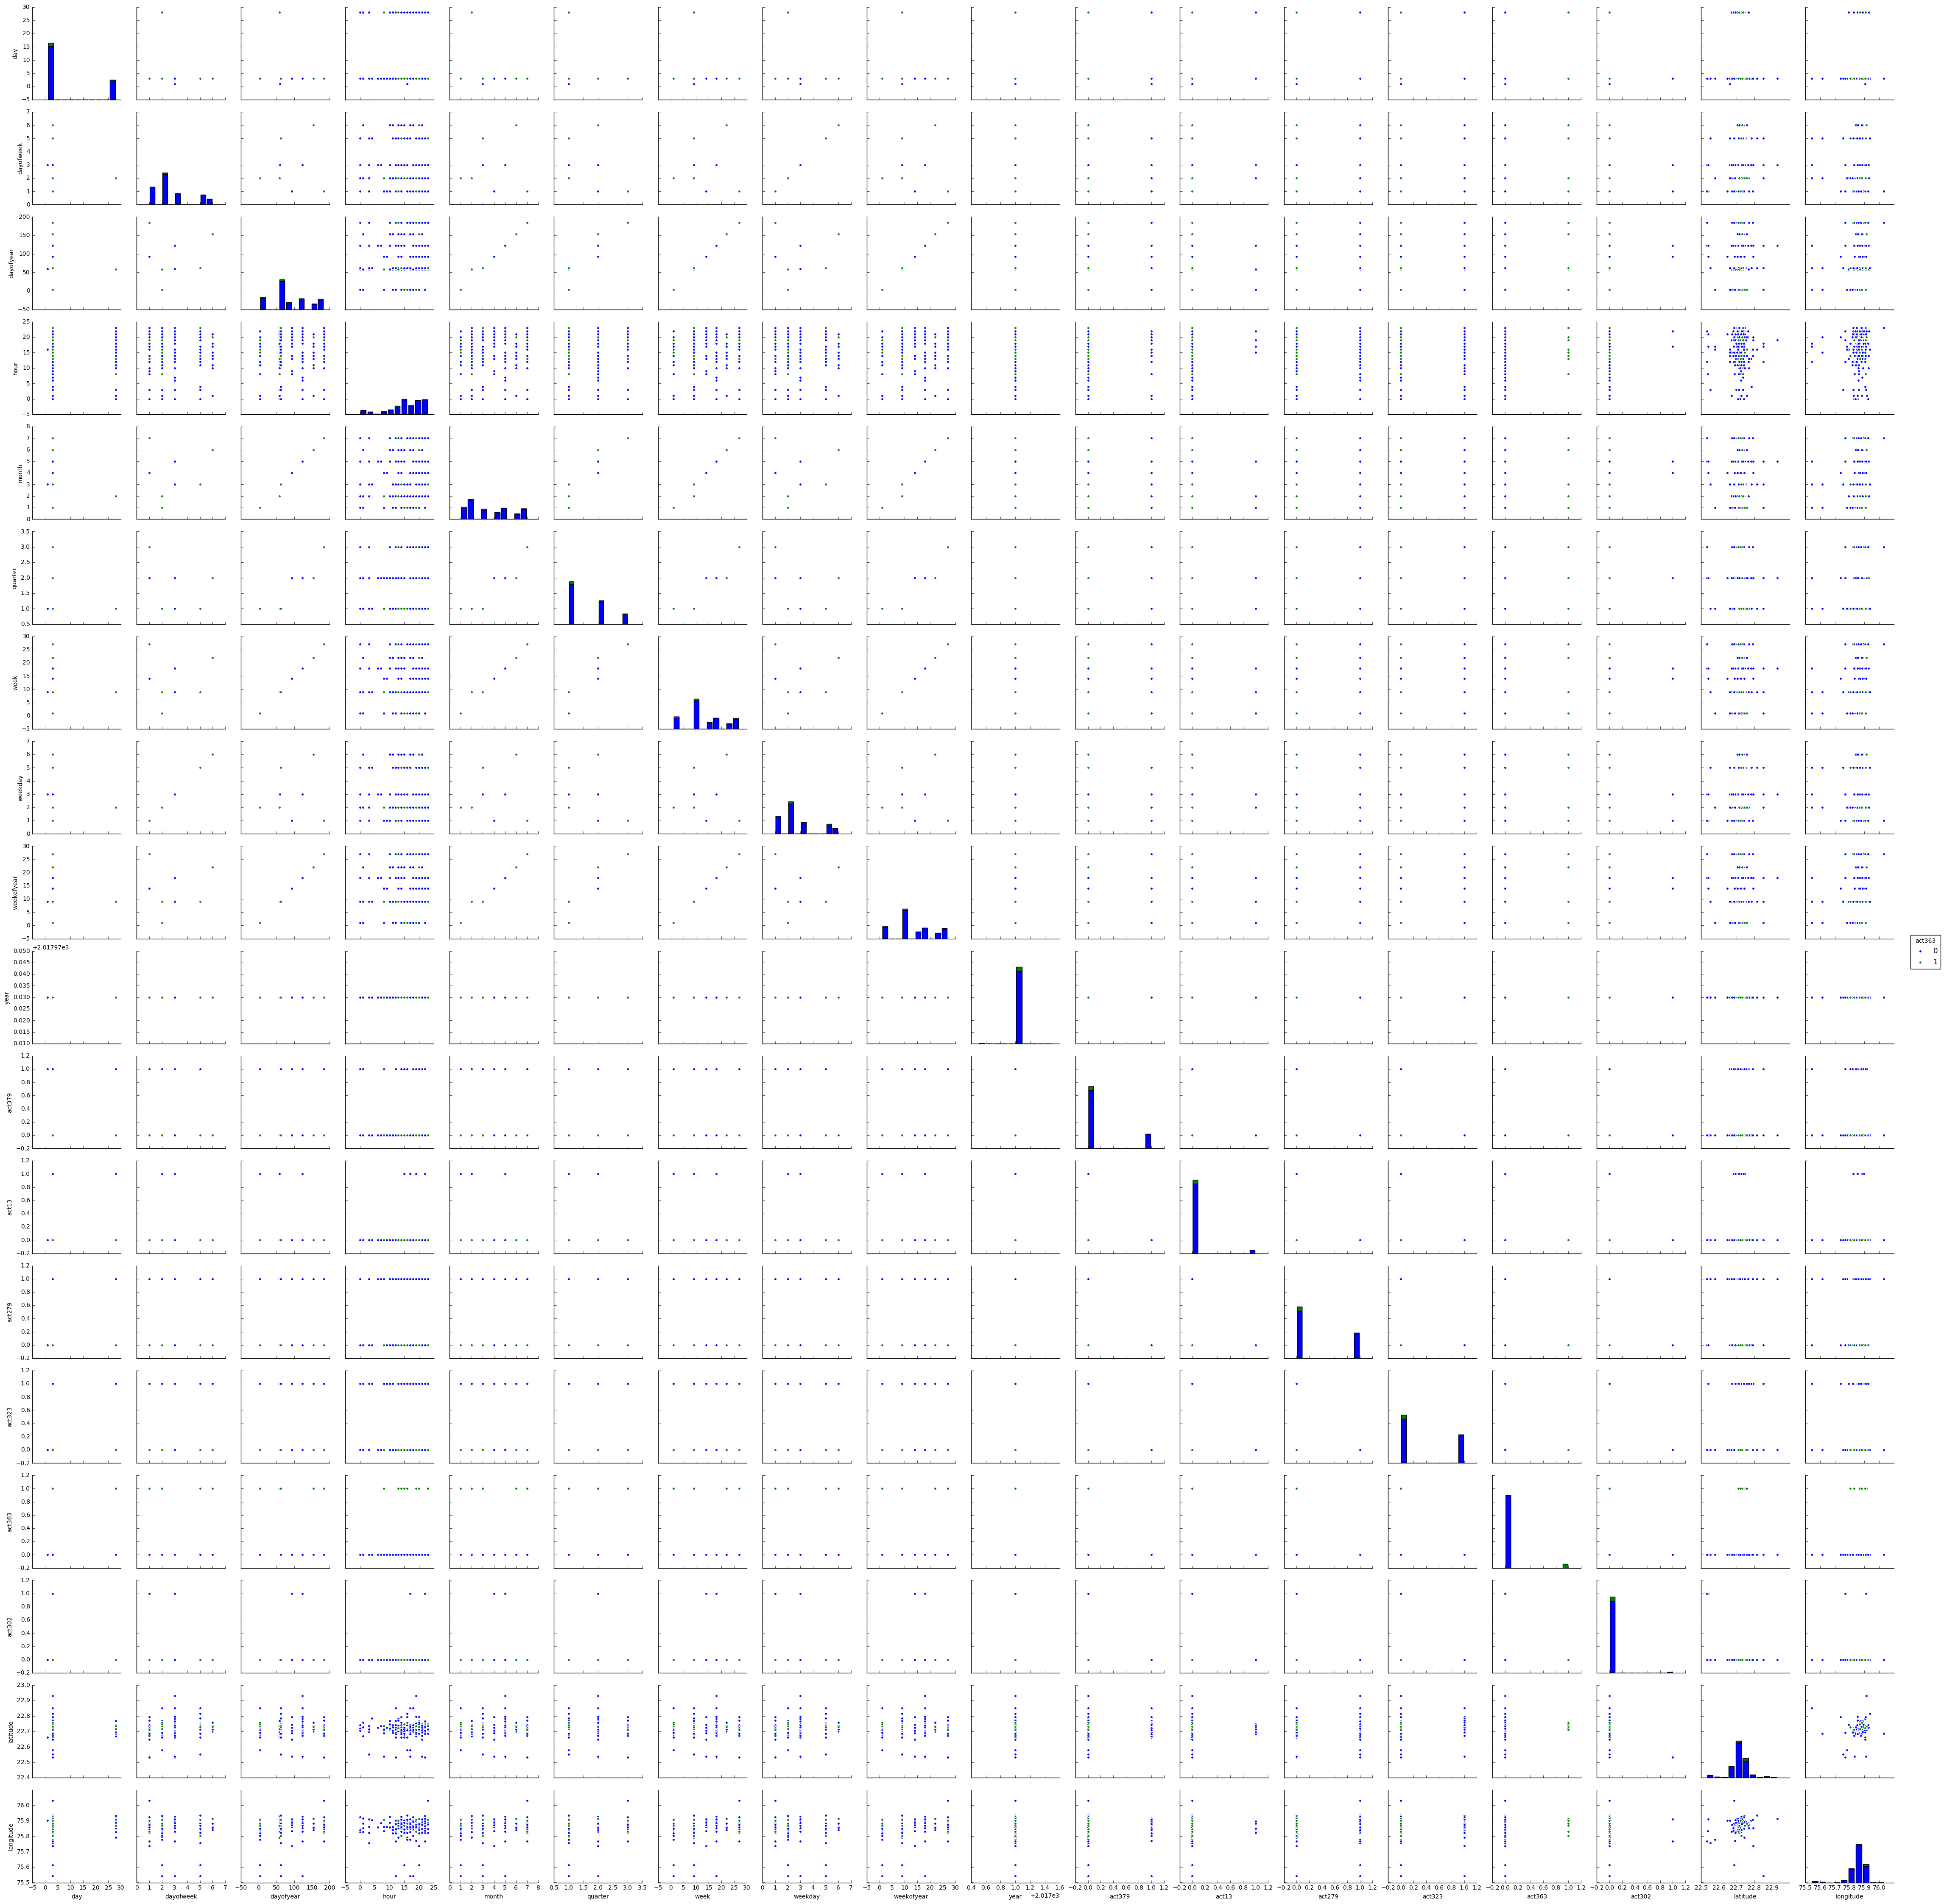

In [16]:
sns.pairplot(data1,hue='act363')

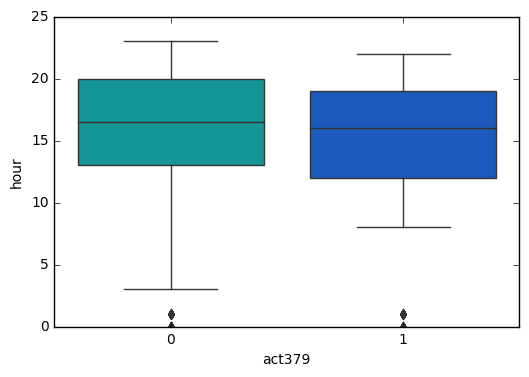

In [17]:
sns.boxplot(x='act379' ,y='hour' ,data=data1, palette='winter_r')

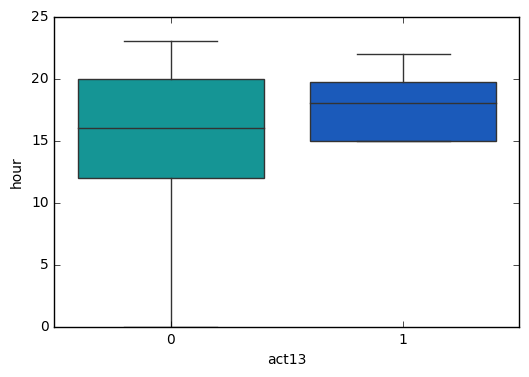

In [18]:
sns.boxplot(x='act13' ,y='hour' ,data=data1 , palette='winter_r')

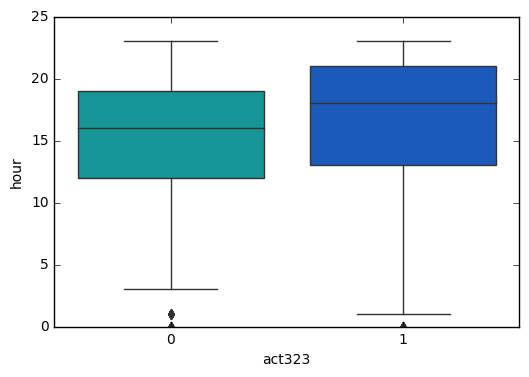

In [19]:
sns.boxplot(x='act323' ,y='hour' ,data=data1, palette='winter_r')

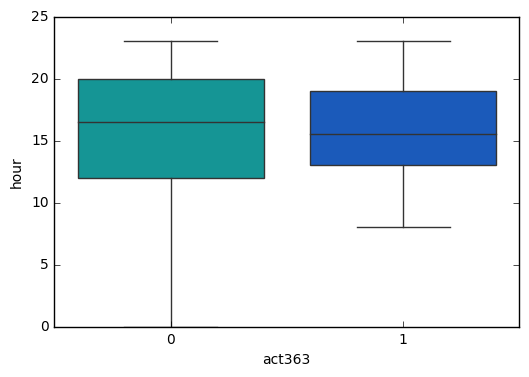

In [20]:
sns.boxplot(x='act363' ,y='hour' ,data=data1, palette='blue')

In [21]:
df = pd.DataFrame(data=data1, columns=['act13', 'hour', 'day'])

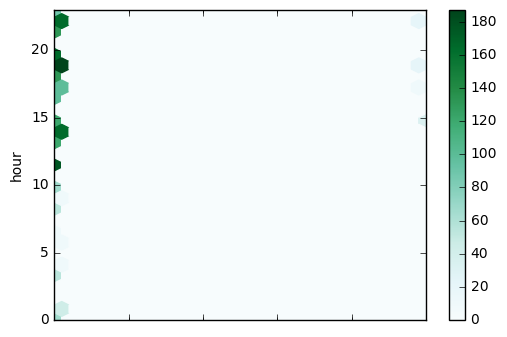

In [22]:
df.plot.hexbin(x='act13',y='hour',gridsize=25)

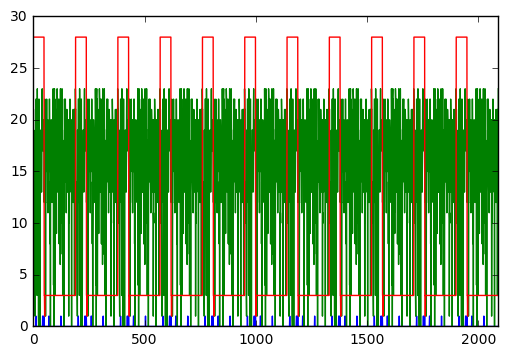

In [23]:
df.plot(legend=False)

In [24]:
df1 = pd.DataFrame(data=data1, columns=['act13', 'act323', 'act379'])

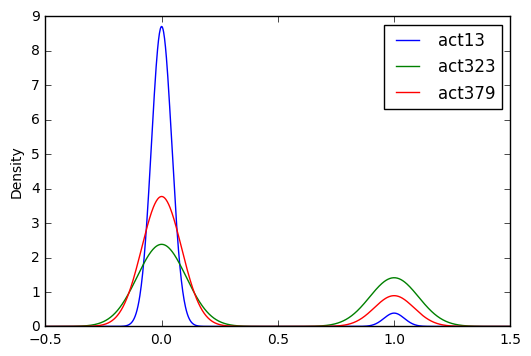

In [25]:
df1.plot.kde()

## X & Y array

In [109]:
X=data1.iloc[:,[1,2,3,4,6,16,17]].values


In [110]:
X

array([[  2.      ,  59.      ,  21.      , ...,   9.      ,  22.73726 ,
         75.875987],
       [  2.      ,  59.      ,  21.      , ...,   9.      ,  22.720992,
         75.876083],
       [  2.      ,  59.      ,  10.      , ...,   9.      ,  22.736676,
         75.883168],
       ...,
       [  1.      , 184.      ,  12.      , ...,  27.      ,  22.531931,
         75.769126],
       [  1.      , 184.      ,  10.      , ...,  27.      ,  22.719569,
         75.857726],
       [  1.      , 184.      ,  23.      , ...,  27.      ,  22.686437,
         76.032055]])

In [111]:
y=data1.iloc[:,[10,11,12,13,14,15]].values

In [154]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [155]:
## Splitting the data

In [156]:
from sklearn.cross_validation import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

## Creating & Training KNN Model

In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [159]:
knn.score(X_test,y_test)

0.9323671497584541

In [160]:
knn.score(X_train,y_train)

0.9770253929866989

### Elbow Method For optimum value of K

In [161]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

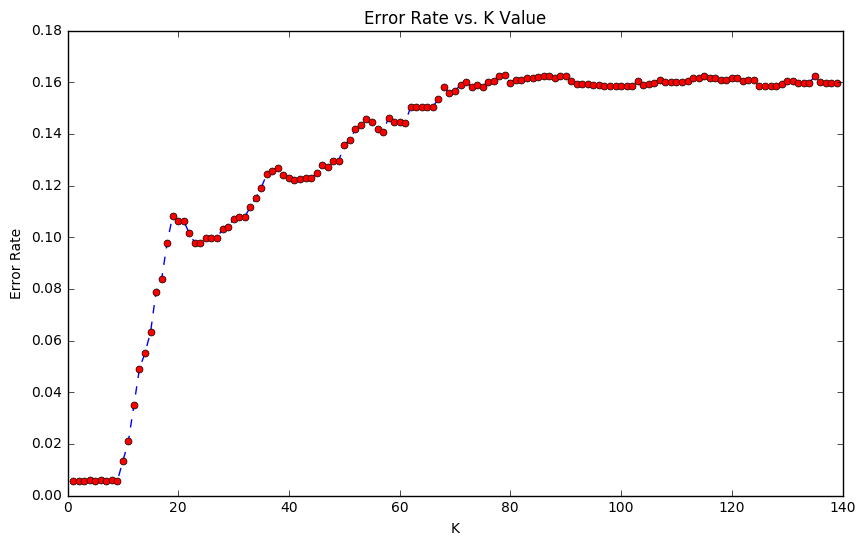

In [162]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Decision Tree Model

In [163]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [164]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=300,
            splitter='best')

In [165]:
y_pred=dtree.predict(X_test)

In [166]:
dtree.score(X_test,y_test)

0.9806763285024155

In [167]:
dtree.score(X_train,y_train)

0.9915356711003628

In [168]:
y_pred

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [169]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)


In [170]:
treefeatures

array([0.04836653, 0.07109194, 0.29701187, 0.03280455, 0.03759273,
       0.24007457, 0.27305781])

In [171]:
features = data1.iloc[:,[1,2,3,4,6,16,17]]

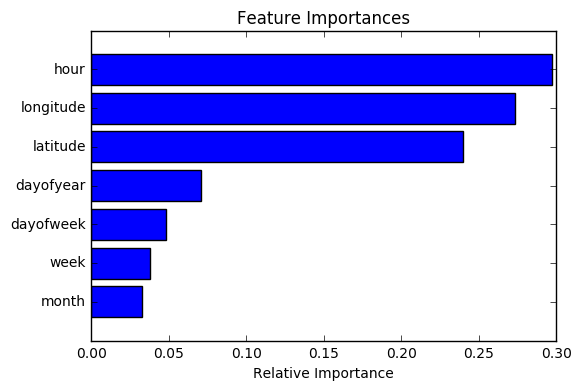

In [172]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

## Tree Visualization